# Question 1

In [155]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [156]:
boston = pd.read_csv('BostonHousing.csv')

In [157]:
print(boston.head())
boston.shape

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


(506, 12)

In [158]:
boston.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'LSTAT', 'MEDV'], dtype=object)

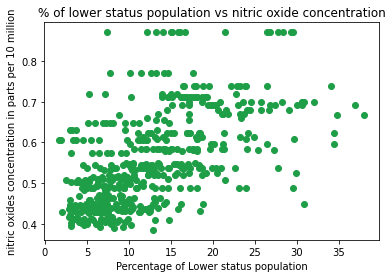

In [159]:
plt.scatter(boston['LSTAT'], boston['NOX'], c='#1E9E47')
plt.xlabel('Percentage of Lower status population')
plt.ylabel('nitric oxides concentration in parts per 10 million')
plt.title( '% of lower status population vs nitric oxide concentration')
plt.show()

In [247]:
boston['LSTAT'].corr(boston['NOX'])

0.5908789208808463

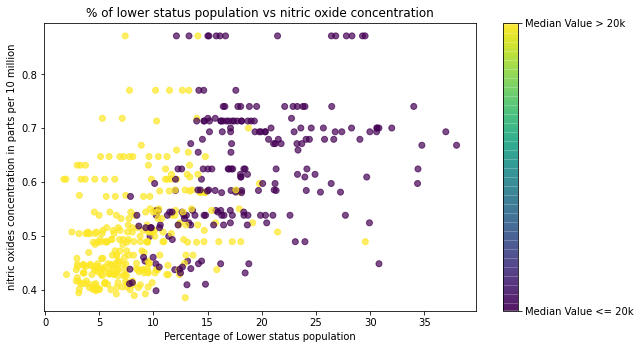

In [248]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.25,1])
boston['medv20000'] = np.where(boston['MEDV']>20,1,0)
plt.scatter(boston['LSTAT'], boston['NOX'], c=boston['medv20000'], alpha = 0.7)
plt.xlabel('Percentage of Lower status population')
plt.ylabel('nitric oxides concentration in parts per 10 million')
plt.title( '% of lower status population vs nitric oxide concentration')
cbar = plt.colorbar(ticks =[0,1] )
cbar.set_ticklabels(["Median Value <= 20k", "Median Value > 20k"])
plt.show()


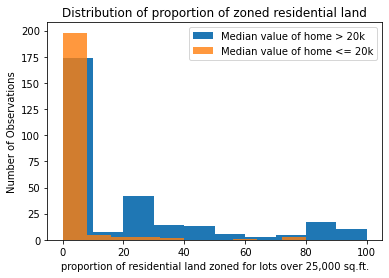

In [161]:
plt.hist(boston.loc[boston['medv20000']==1,'ZN' ],10)
plt.hist(boston.loc[boston['medv20000']==0,'ZN' ],10, alpha = 0.8)
plt.legend(['Median value of home > 20k', 'Median value of home <= 20k'])
plt.xlabel('proportion of residential land zoned for lots over 25,000 sq.ft.')
plt.ylabel('Number of Observations')
plt.title('Distribution of proportion of zoned residential land')
plt.show()


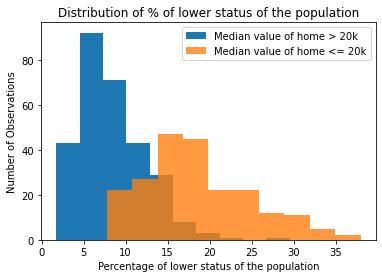

In [162]:
plt.hist(boston.loc[boston['medv20000']==1,'LSTAT' ],10)
plt.hist(boston.loc[boston['medv20000']==0,'LSTAT' ],10, alpha = 0.8)
plt.legend(['Median value of home > 20k', 'Median value of home <= 20k'])
plt.xlabel('Percentage of lower status of the population')
plt.ylabel('Number of Observations')
plt.title('Distribution of % of lower status of the population')
plt.show()

In [163]:
boston['medv20000'].sum()

291

In [164]:
boston['CHAS'].sum()

35

In [165]:
boston.loc[boston['CHAS']==1, 'PTRATIO' ].mean()

17.491428571428575

# Question 2

In [166]:
app = pd.read_csv('ApplianceShipments.csv')

In [167]:
app.shape

(20, 3)

In [168]:
app.head()

,Year,Quarter,Shipments
0,1985,1,4009
1,1985,2,4321
2,1985,3,4224
3,1985,4,3944
4,1986,1,4123


In [169]:
app.columns.values

array(['Year', 'Quarter', 'Shipments'], dtype=object)

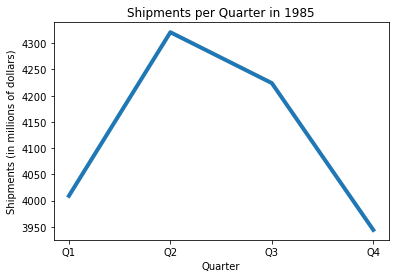

In [170]:
plt.plot(app.loc[app['Year']==1985,'Quarter'],app.loc[app['Year']==1985,'Shipments'], linewidth = 4)
plt.xlabel('Quarter')
plt.ylabel('Shipments (in millions of dollars)')
plt.title('Shipments per Quarter in 1985')
plt.xticks([1,2,3,4],['Q1','Q2','Q3','Q4'])
plt.show()

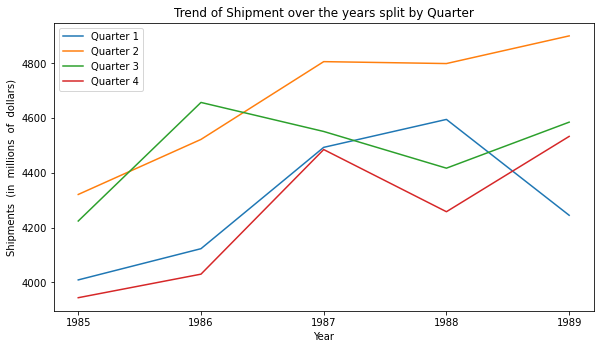

In [171]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.25,1])

plt.plot(app.loc[app['Quarter']==1,'Year'], app.loc[app['Quarter']==1,'Shipments'])
plt.plot(app.loc[app['Quarter']==2,'Year'], app.loc[app['Quarter']==2,'Shipments'])
plt.plot(app.loc[app['Quarter']==3,'Year'], app.loc[app['Quarter']==3,'Shipments'])
plt.plot(app.loc[app['Quarter']==4,'Year'], app.loc[app['Quarter']==4,'Shipments'])
plt.legend(['Quarter 1','Quarter 2','Quarter 3','Quarter 4'])
plt.xlabel('Year')
plt.ylabel('Shipments  (in  millions  of  dollars)')
plt.title('Trend of Shipment over the years split by Quarter')
plt.xticks(range (min(app.loc[:,"Year"]), max(app.loc[:,"Year"])+1,1))
plt.show()

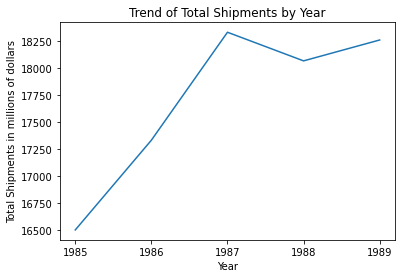

In [172]:
app_ = app.loc[:,['Shipments','Year']].groupby(['Year']).sum()
app_.plot(kind = "line", legend=[], xlabel = 'Year', ylabel ='Total Shipments in millions of dollars', title = 'Trend of Total Shipments by Year')
plt.xticks(range (min(app.loc[:,"Year"]), max(app.loc[:,"Year"])+1,1))
plt.show()


# Question 3

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [174]:
toyota = pd.read_csv('ToyotaCorolla.csv')

In [175]:
toyota.head()

,Price,Age,KM,HP,Met_Color,Automatic,Doors,Weight
0,13500,23,46986,90,1,0,3,1165
1,13750,23,72937,90,1,0,3,1165
2,13950,24,41711,90,1,0,3,1165
3,14950,26,48000,90,0,0,3,1165
4,13750,30,38500,90,0,0,3,1170


In [176]:
toyota.shape

(1436, 8)

In [177]:
toyota.columns.values

array(['Price', 'Age', 'KM', 'HP', 'Met_Color', 'Automatic', 'Doors',
       'Weight'], dtype=object)

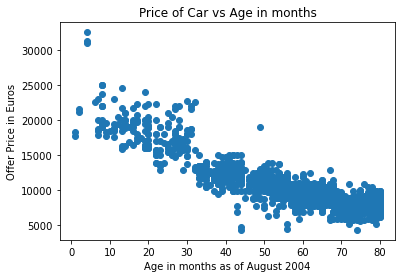

In [178]:
plt.scatter(toyota['Age'], toyota['Price'])
plt.ylabel('Offer Price in Euros')
plt.xlabel('Age in months as of August 2004')
plt.title('Price of Car vs Age in months')
plt.show()

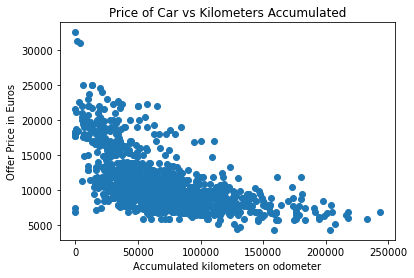

In [179]:
plt.scatter(toyota['KM'], toyota['Price'])
plt.ylabel('Offer Price in Euros')
plt.xlabel('Accumulated kilometers on odometer')
plt.title('Price of Car vs Kilometers Accumulated')
plt.show()

In [180]:
select_index = ['Age','KM']
toyota_X = toyota.loc[:, select_index]  # Attribute matrix will always be represented by capital X in variable name

toyota_y = toyota.iloc[:,0] # target matrix represented by small y in variable name


In [181]:
X_train, X_valid, y_train, y_valid = train_test_split (toyota_X, toyota_y, test_size = 0.2, random_state = 77)

In [201]:
model = LinearRegression()
model.fit( X_train, y_train )
np.set_printoptions (precision = 4, suppress = True) # 4 decimal point and suppresses scientific notation
print (model.coef_) #b1,b2,b3
print ('%.4f' % model.intercept_) # b0


[-154.6958   -0.0154]
20440.3509


Price = 20440.3509-154.6958*(Age) -0.0154*(KM)

In [183]:
y_pred = model.predict( X_valid )
e = y_valid - y_pred
np.mean(np.abs(e))

1188.577016600191

In [184]:
y_pred_train = model.predict(X_train)
e_train = y_train - y_pred_train
np.mean(np.abs(e_train))

1180.9359879662018

In [185]:
y_new_pred = model.predict ([ [48,41636] ])
y_new_pred

array([12372.2738])

# Question 4

In [188]:
airfare = pd.read_csv('Airfares.csv')

In [244]:
airfare.head()

,COUPON,NEW,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,1.00,3,1,5291.99,28637,21112,3036732,205711,312,7864,64.11
1,1.06,3,0,5419.16,26993,29838,3532657,7145897,576,8820,174.47
2,1.06,3,0,9185.28,30124,29838,5787293,7145897,364,6452,207.76
3,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47
4,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47


In [190]:
airfare.shape

(638, 11)

In [191]:
airfare.columns.values

array(['COUPON', 'NEW', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP',
       'E_POP', 'DISTANCE', 'PAX', 'FARE'], dtype=object)

In [197]:
selected_index =['COUPON', 'NEW', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP',
       'E_POP', 'DISTANCE', 'PAX']
airfare_X = airfare.loc[:, selected_index]
airfare_y = airfare.iloc[:,-1]


In [202]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split (airfare_X, airfare_y, test_size = 0.3, random_state = 22)

In [205]:
model1 = LinearRegression()
model1.fit( X1_train, y1_train )
np.set_printoptions (precision = 4, suppress = True) # 4 decimal point and suppresses scientific notation
print (model1.coef_) #b1,b2,b3
print ('%.4f' % model1.intercept_) # b0


[  9.3088  -0.6511 -42.9638   0.0085   0.0026   0.0023   0.       0.
   0.0663  -0.0012]
-113.5858


Coefficient for NEW is -0.6511 
Coefficient for PAX is -0.0012

In [206]:
y1_pred = model1.predict( X1_valid )
e1 = y1_valid - y1_pred
np.mean(np.abs(e1))

33.359415423056106

In [207]:
y1_pred_train = model1.predict(X1_train)
e1_train = y1_train - y1_pred_train
np.mean(np.abs(e1_train))

29.504480916887168

In [208]:
X1_train.head()

,COUPON,NEW,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX
497,1.27,3,0,3654.11,29260,34880,7830332,1594251,1837,4600
188,1.29,1,0,6108.57,32991,26695,8621121,1646147,736,6590
271,1.36,3,0,2263.81,24575,32991,1197234,8621121,2237,26582
438,1.64,3,0,3863.50,32991,21121,8621121,1228816,1982,4739
548,1.55,3,0,3503.11,22360,22069,1421287,743633,1054,3861


In [212]:
y1_new_pred = model1.predict ([ [1.202,3, 0,4442.141,28760, 27664,4557004,3195503, 1976,12782 ] ])
y1_new_pred #without southwest

array([241.973])

In [213]:
y1_new_pred_sw = model1.predict ([ [1.202,3, 1,4442.141,28760, 27664,4557004,3195503, 1976,12782 ] ])
y1_new_pred_sw # with southwest

array([199.0092])

In [214]:
y1_new_pred -y1_new_pred_sw

array([42.9638])

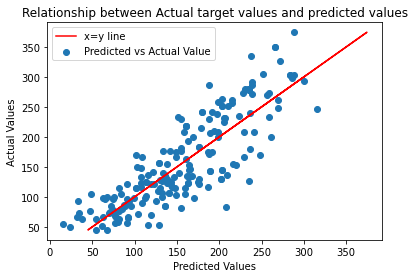

In [231]:
plt.scatter (y1_pred, y1_valid)
plt.xlabel('Predicted Values')
plt.ylabel ('Actual Values')
plt.title('Relationship between Actual target values and predicted values')
plt.plot(y1_valid,y1_valid, c='r')
plt.legend(['x=y line', 'Predicted vs Actual Value'])
plt.show()

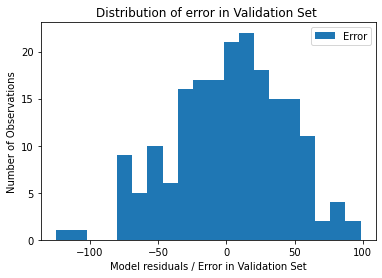

In [242]:
plt.hist(e1, 20)
plt.xlabel ('Model residuals / Error in Validation Set')
plt.ylabel('Number of Observations')
plt.legend(['Error'])
plt.title('Distribution of error in Validation Set ')
plt.show()
